In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
clas = pd.read_csv("retail_sales_dataset.csv")
clas

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [6]:
# Display basic information about the dataset
clas.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [7]:
clas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
clas.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')

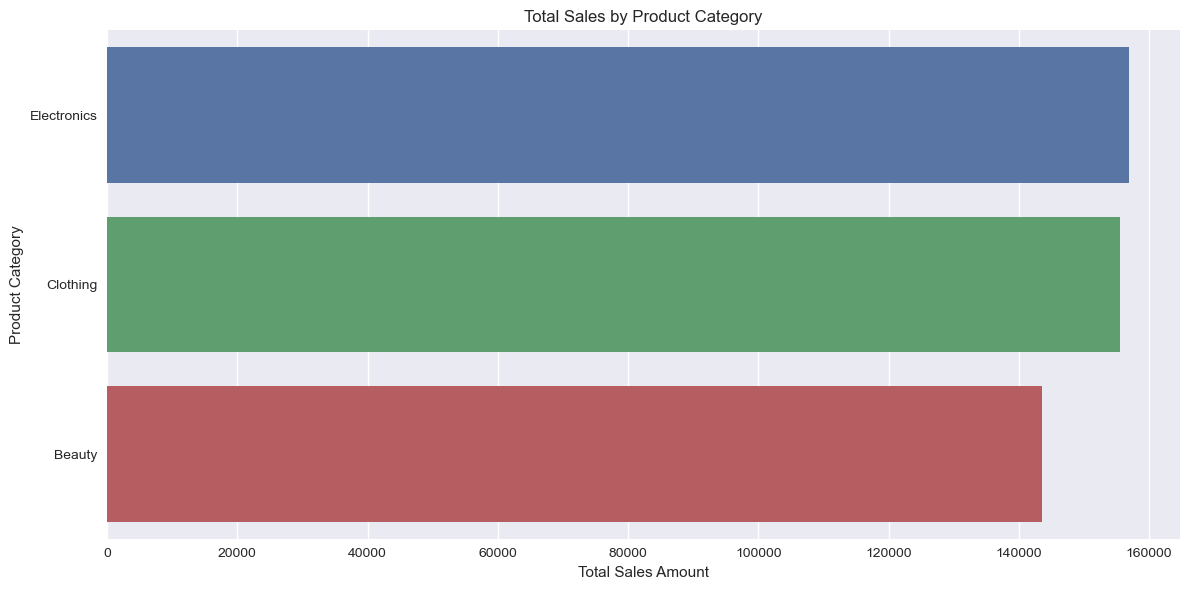

In [10]:
# 1. Sales Distribution by Product Category
plt.figure(figsize=(12, 6))
sales_by_category = clas.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.values, y=sales_by_category.index)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales Amount')
plt.tight_layout()
plt.show()

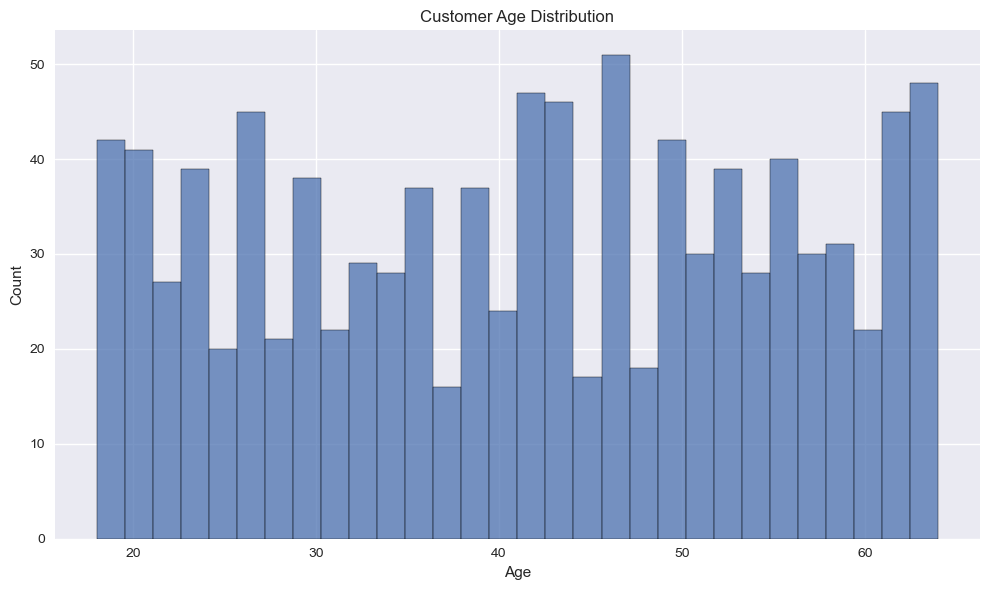

In [11]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=clas, x='Age', bins=30)
plt.title('Customer Age Distribution')
plt.tight_layout()
plt.show()

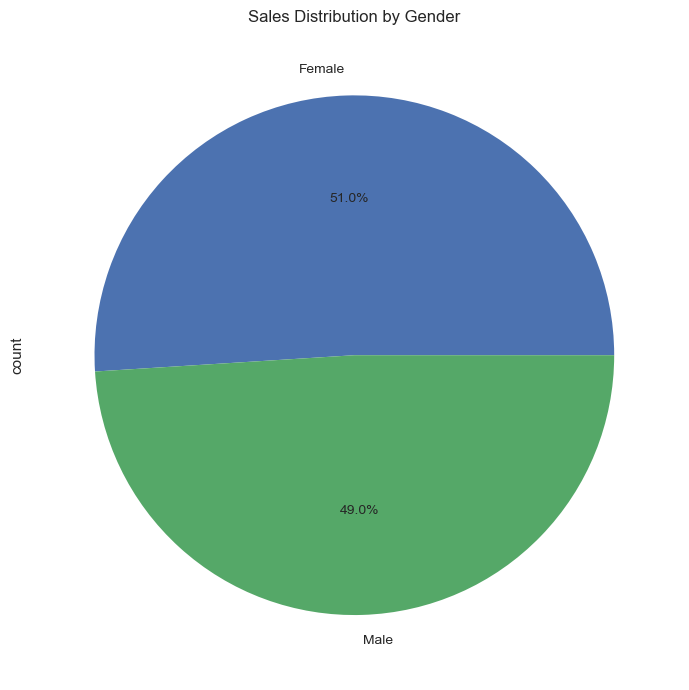

In [37]:
# 3. Gender Distribution in Sales
plt.figure(figsize=(12, 7))
clas['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Gender')
plt.tight_layout()
plt.show()

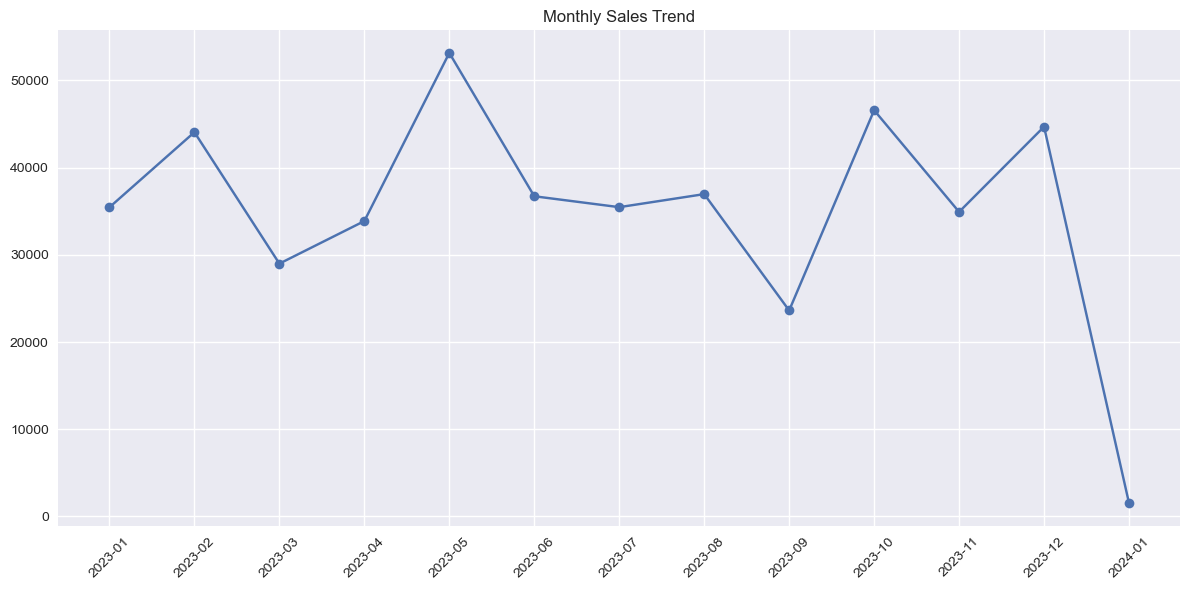

In [40]:
# Convert Date column to datetime
clas['Date'] = pd.to_datetime(clas['Date'])

# 4. Monthly Sales Trend
monthly_sales = clas.groupby(clas['Date'].dt.strftime('%Y-%m'))['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Calculate some key metrics
print("\
Key Insights:")
print("Average transaction value: $", round(clas['Total Amount'].mean(), 2))
print("Most popular product category:", clas['Product Category'].mode().iloc[0])
print("Average customer age:", round(clas['Age'].mean(), 2))
print("Total revenue: $", round(clas['Total Amount'].sum(), 2))

Key Insights:
Average transaction value: $ 456.0
Most popular product category: Clothing
Average customer age: 41.39
Total revenue: $ 456000


In [42]:
# 1. Daily Sales Analysis
daily_sales = clas.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales = daily_sales.set_index('Date')

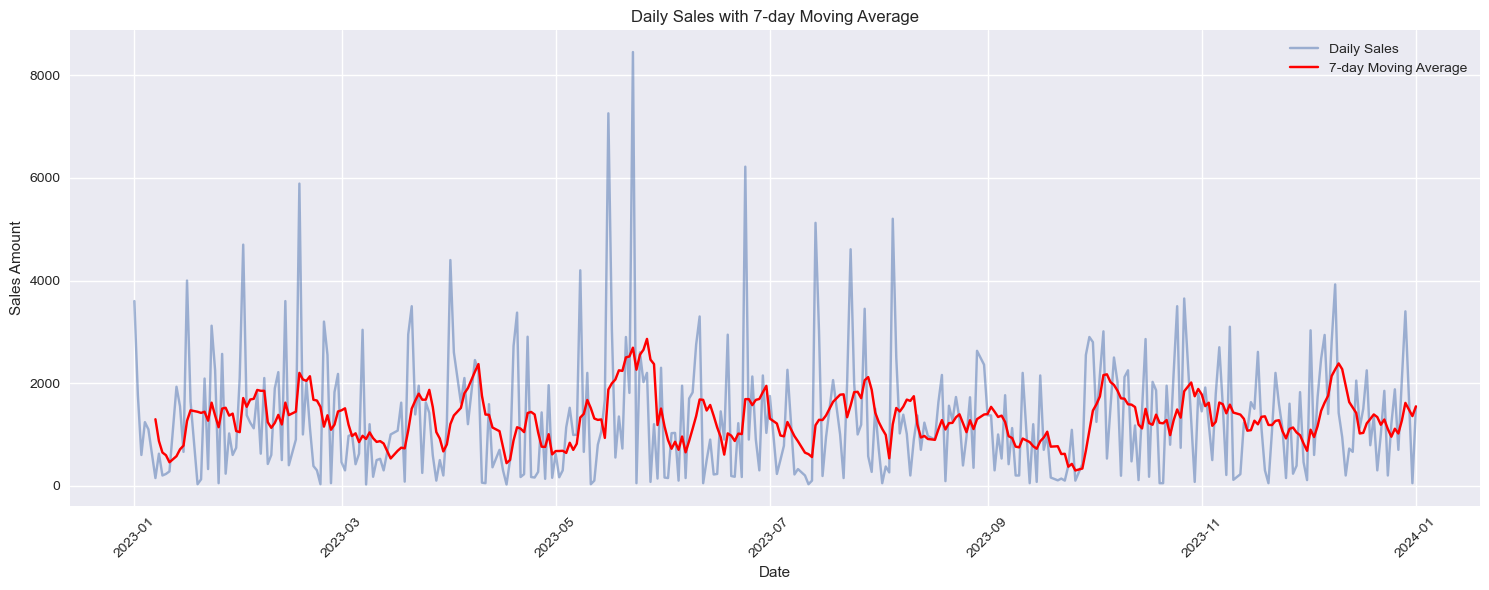

In [43]:
# Calculate 7-day rolling average
daily_sales['7_day_MA'] = daily_sales['Total Amount'].rolling(window=7).mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales['Total Amount'], alpha=0.5, label='Daily Sales')
plt.plot(daily_sales.index, daily_sales['7_day_MA'], color='red', label='7-day Moving Average')
plt.title('Daily Sales with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

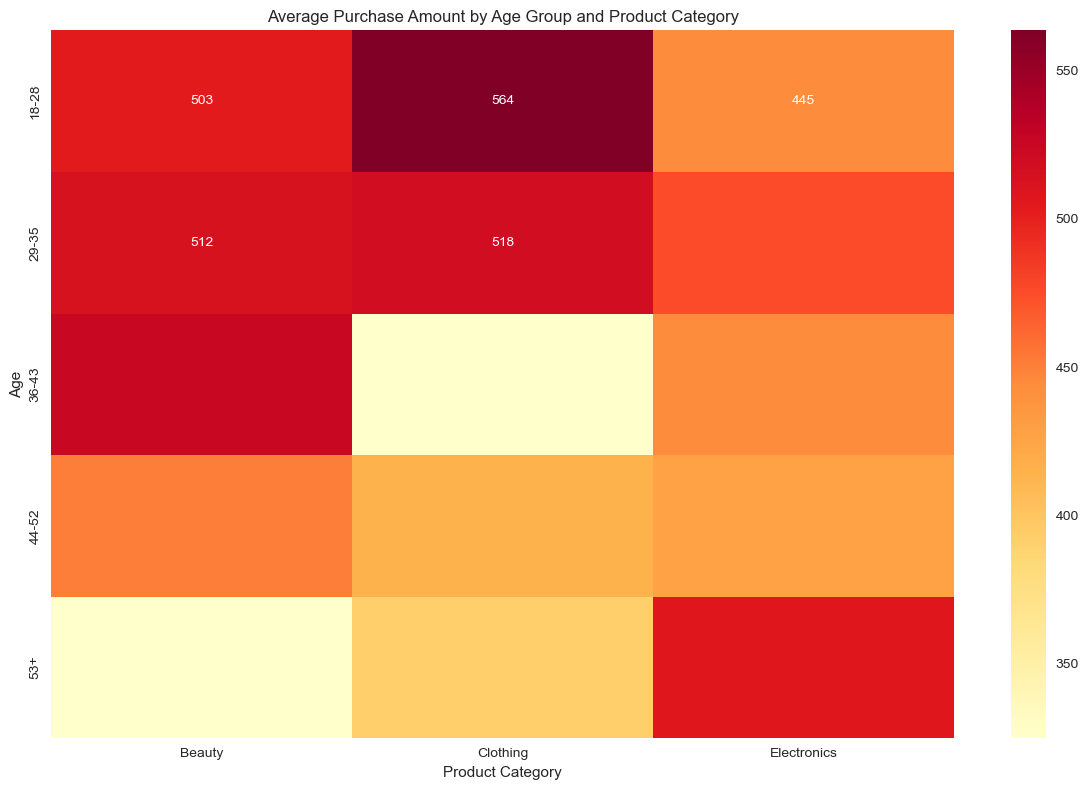

In [47]:
# 2. Customer Purchase Behavior - Heatmap
pivot_table = clas.pivot_table(
    values='Total Amount',
    index=pd.qcut(clas['Age'], q=5, labels=['18-28', '29-35', '36-43', '44-52', '53+']),
    columns='Product Category',
    aggfunc='mean'
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Purchase Amount by Age Group and Product Category')
plt.tight_layout()
plt.show()

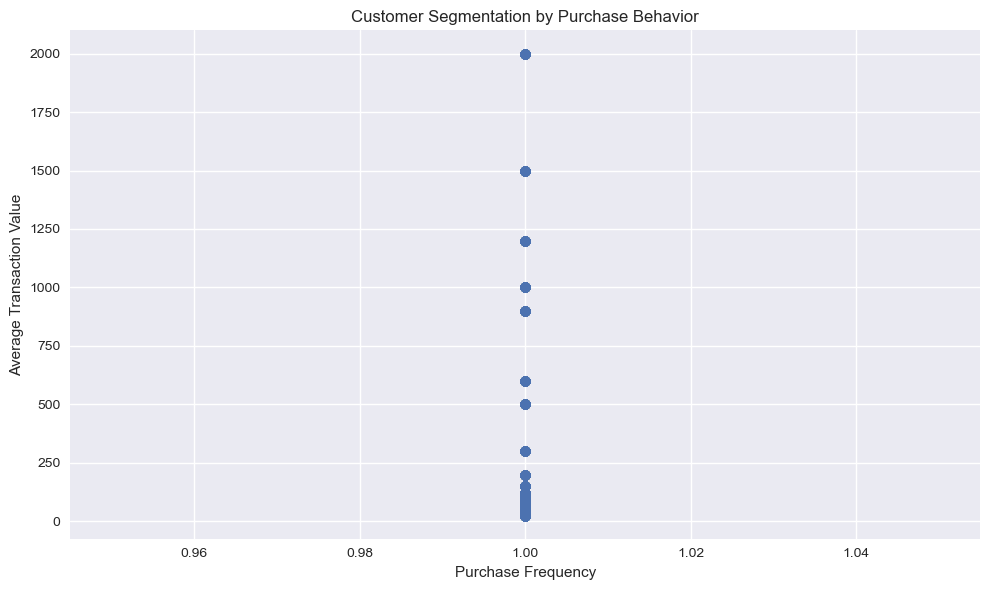

In [48]:
# 3. Customer Segmentation by Purchase Frequency and Amount
customer_segments = clas.groupby('Customer ID').agg({
    'Transaction ID': 'count',
    'Total Amount': 'sum'
}).reset_index()

customer_segments.columns = ['Customer ID', 'Purchase_Frequency', 'Total_Spent']
customer_segments['Average_Transaction_Value'] = customer_segments['Total_Spent'] / customer_segments['Purchase_Frequency']

plt.figure(figsize=(10, 6))
plt.scatter(customer_segments['Purchase_Frequency'], 
           customer_segments['Average_Transaction_Value'],
           alpha=0.5)
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Transaction Value')
plt.title('Customer Segmentation by Purchase Behavior')
plt.tight_layout()
plt.show()

In [53]:
# Print key statistics and insights
print("\
Detailed Statistics:")
print("\
Product Category Analysis:")
category_stats = clas.groupby('Product Category').agg({
    'Total Amount': ['count', 'mean', 'sum'],
    'Quantity': 'sum'
}).round(2)
print(category_stats)

print("\
Customer Segments:")
print("Number of unique customers:", clas['Customer ID'].nunique())
print("Average purchases per customer:", round(clas['Transaction ID'].count() / clas['Customer ID'].nunique(), 2))

Detailed Statistics:
Product Category Analysis:
                 Total Amount                 Quantity
                        count    mean     sum      sum
Product Category                                      
Beauty                    307  467.48  143515      771
Clothing                  351  443.25  155580      894
Electronics               342  458.79  156905      849
Customer Segments:
Number of unique customers: 1000
Average purchases per customer: 1.0


In [55]:
# Check for data quality
print("\
Data Quality Check:")
print("Missing values:", clas.isnull().sum().sum())
print("Date range:", f"From {clas['Date'].min()} to {clas['Date'].max()}")

Data Quality Check:
Missing values: 0
Date range: From 2023-01-01 00:00:00 to 2024-01-01 00:00:00
